# MCPs Timing correlation and correlation to HGC

First, we do the necessary imports. [Pandas](https://pandas.pydata.org/) for managing data, [NumPy](http://www.numpy.org/) for numerical operations, and [matplotlib](https://matplotlib.org/) to show plots:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Of course we don't want to miss the [HGC testbeam tools](https://llrgit.in2p3.fr/rembser/hgc-testbeam-mini-stage/tree/master/python-package):

In [2]:
import hgc_testbeam as hgc

In [3]:
df_hgc = hgc.load_run(1042)
df_hgc.event = df_hgc.event.astype(np.uint64)
df_hgc.dtypes
df_hgc = df_hgc.set_index(["event", "rechit_detid"])
df_mcp = hgc.load_run(1042, key="MCPntupler/MCP").set_index("event")
df = df_hgc.join(df_mcp, how="inner", lsuffix="_hgc", rsuffix="_dwc")

In [4]:
df_mcp.columns

Index(['run', 'valid_TS_MCP1', 'valid_TS_MCP2', 'noise_MCP1', 'noise_MCP2',
       'TSpeak_MCP1', 'TSpeak_MCP2', 'amp_MCP1', 'amp_MCP2', 'ampFit_MCP1',
       'ampFit_MCP2', 'TSfitPeak_MCP1', 'TSfitPeak_MCP2', 'TScf_MCP1',
       'TScf_MCP2', 'charge5nsS_MCP1', 'charge5nsS_MCP2', 'charge5nsB_MCP1',
       'charge5nsB_MCP2', 'TS_toClock_FE_MCP1', 'TS_toClock_FE_MCP2',
       'meanClockFE', 'rmsClockFE'],
      dtype='object')

In [5]:
df_sel_1 = df.query("valid_TS_MCP1*valid_TS_MCP2 == 1")

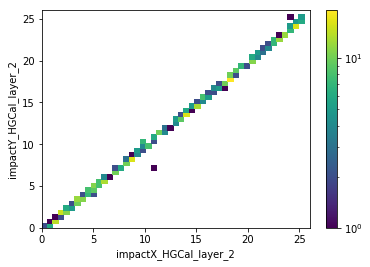

In [6]:
bins = np.linspace(0, 26, 50)
plt.hist2d(df_sel_1.TS_toClock_FE_MCP1, df_sel_1.TS_toClock_FE_MCP2, bins=bins, norm=LogNorm())
plt.colorbar()
plt.xlabel("impactX_HGCal_layer_2")
plt.ylabel("impactY_HGCal_layer_2")
plt.show()